In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [10]:
m = 0.1
r = 0.1
d = 0.3
g = 9.81


iz = 0.5*m*r**2
io = 0.25*m*r**2 + m*d**2

In [11]:
def System(r0,t):
    phi, psi, teta, dteta = r0
    psi_p = 400

    momento_phi = iz*psi_p*np.cos(np.pi/4)

    dphi = (momento_phi - iz*psi_p*np.cos(teta))/(io*np.sin(teta)**2 + iz*np.cos(teta)**2)
    dtetp = ((dphi**2)*np.sin(teta)*np.cos(teta)*(io-iz) - (psi_p*dphi*iz*np.sin(teta)) + m*g*d*np.sin(teta))/io

    return [dphi,psi_p,dteta,dtetp]

In [12]:
r0 = [0.,0.,np.pi/4,0.]
t = np.linspace(0,8,1000)

I = integrate.odeint(System, r0, t)

L_phi = I[:,0]
L_tet = I[:,2]

In [13]:
x = r*np.sin(L_tet)*np.cos(L_phi)
y = r*np.sin(L_tet)*np.sin(L_phi)
z = r*np.cos(L_tet)

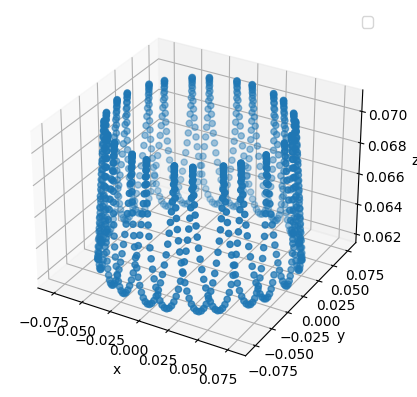

In [14]:
ax = plt.figure().add_subplot(projection='3d')

# Prepare arrays x, y, z

ax.scatter(x, y, z, label='')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

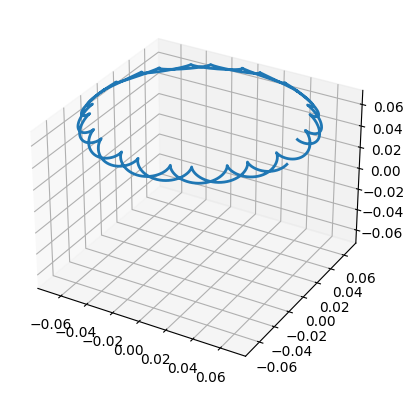

In [19]:
def init():
    line.set_data([],[])
    line.set_3d_properties([])
    return line,

def update(frame):
    line.set_data(x[:frame],y[:frame])
    line.set_3d_properties(z[:frame])
    return line,

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.set_xlim(-0.075,0.075)
ax.set_ylim(-0.075,0.075)
ax.set_zlim(-0.070,0.070)

line, = ax.plot(x,y,z,lw=2)
ani = FuncAnimation(fig,update,frames=len(y),init_func=init,blit=True)
HTML(ani.to_html5_video())

In [20]:
print("Se observa que, por la animación, el trompo se toma un tiempo de alrededor de",4,"s para completar una vuelta dado que completa",2,"vueltas en",8,"segundos.")

Se observa que, por la animación, el trompo se toma un tiempo de alrededor de 4 s para completar una vuelta dado que completa 2 vueltas en 8 segundos.


In [21]:
print("Por esto, se calcula que la distancia que recorre es",2*np.pi*r,"donde es el radio es de",0.075,". Con esto, tomando que la velocidad de precesión es distancia sobre tiempo, se tiene que la velocidad es",0.11,"m/s.")

Por esto, se calcula que la distancia que recorre es 0.6283185307179586 donde es el radio es de 0.075 . Con esto, tomando que la velocidad de precesión es distancia sobre tiempo, se tiene que la velocidad es 0.11 m/s.
